# OGC WPS

[OGC Web Processing Service](https://www.ogc.org/standards/wps) (WPS) provides standardized interface to geospatial processing services. 

#### Connect Geo-harmonizer demo WPS service and get basic metadata.

Geo-harmonizer demostration WPS service is available at:  http://157.90.183.85:8080/services/wps

Git repository: https://gitlab.com/geoharmonizer_inea/web-processing/-/tree/master/wps

Request GetCapabilities: http://157.90.183.85:8080/services/wps?service=wps&request=getcapabilities

In [1]:
from owslib.wps import WebProcessingService

url = "http://157.90.183.85:8080/services/wps"
wps = WebProcessingService(url)
wps.getcapabilities()

print(
    wps.identification.type, '|',
    wps.identification.title, '|',
    wps.identification.abstract,
)

WPS | Geo-harmonizer demo WPS server. | Geo-harmonizer demo WPS server.


#### Get list of available processes.

In [2]:
for process in wps.processes:
    print(process.identifier, '|', process.title)

aq-pm-aggregate | Air Quality PM2.5 aggregation


#### Describe input and output parameters of selected process.

Request DescribeProcess: http://157.90.183.85:8080/services/wps?service=wps&version=1.0.0&request=describeprocess&identifier=aq-pm-aggregate

In [4]:
from owslib.wps import printInputOutput

process_id = 'aq-pm-aggregate'

process = wps.describeprocess(process_id)

print(
    process.identifier, '|',
    process.title, '|',
    process.abstract, '|'
)

aq-pm-aggregate | Air Quality PM2.5 aggregation | Generates aggregated PM2.5 product for specified time window |


In [4]:
from owslib.wps import printInputOutput

# list input parameters
for input in process.dataInputs:
    printInputOutput(input)

 identifier=start_date, title=Start date, abstract=None, data type=string
 Default Value: None 
 minOccurs=1, maxOccurs=1
 identifier=end_date, title=End date, abstract=None, data type=string
 Default Value: None 
 minOccurs=1, maxOccurs=1


In [5]:
# list output parameters
for output in process.processOutputs:
    printInputOutput(output)

 identifier=output, title=Output aggregated raster file, abstract=None, data type=ComplexData
 Supported Value: mimeType=image/tiff; subtype=geotiff, encoding=base64, schema=None
 Default Value: mimeType=image/tiff; subtype=geotiff, encoding=base64, schema=None 
 reference=None, mimeType=None


#### Execute selected process.

Request Execute: http://157.90.183.85:8080/services/wps?service=wps&version=1.0.0&request=execute&identifier=aq-pm-aggregate&datainputs=start_date=2018-01-01;end_date=2018-01-14

In [5]:
# input parameters
inputs = [
    ("start_date", "2018-08-01"),
    ("end_date", "2018-08-14")
]

execution = wps.execute(process_id, inputs, output=[])
from owslib.wps import monitorExecution
monitorExecution(execution)

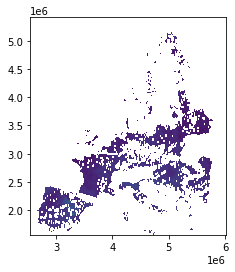

<AxesSubplot:>

In [6]:
data = execution.processOutputs[0].retrieveData()
filename = "output.tif"
with open(filename, "bw") as fd:
    fd.write(data)

import rasterio
from rasterio.plot import show
img = rasterio.open(filename)
show(img)

#### Execute selected process asynchronously.

In [7]:
from owslib.wps import WebProcessingService

url = "http://157.90.183.85:8080/services/wps"
wps = WebProcessingService(url)

# input parameters
inputs = [
    ("start_date", "2018-06-01"),
    ("end_date", "2018-06-14")
]

import sys

def monitorExecution(execution, sleepSecs=3):
    while execution.isComplete() is False:
        execution.checkStatus(sleepSecs=sleepSecs)

        print({
            "status": execution.status,
            "message": execution.statusMessage,
            "percent": execution.percentCompleted
        })

execution = wps.execute(process_id, inputs, output=[])
monitorExecution(execution)

{'status': 'ProcessStarted', 'message': 'Computation progress', 'percent': 5}
{'status': 'ProcessStarted', 'message': 'Computation progress', 'percent': 10}
{'status': 'ProcessStarted', 'message': 'Computation progress', 'percent': 10}
{'status': 'ProcessStarted', 'message': 'Computation progress', 'percent': 10}
{'status': 'ProcessStarted', 'message': 'Computation progress', 'percent': 70}
{'status': 'ProcessSucceeded', 'message': 'PyWPS Process Air Quality PM2.5 aggregation finished', 'percent': 100}


#### QGIS WPS client

Install from ZIP: https://github.com/OpenGeoLabs/qgis-wps-plugin/archive/refs/heads/master.zip

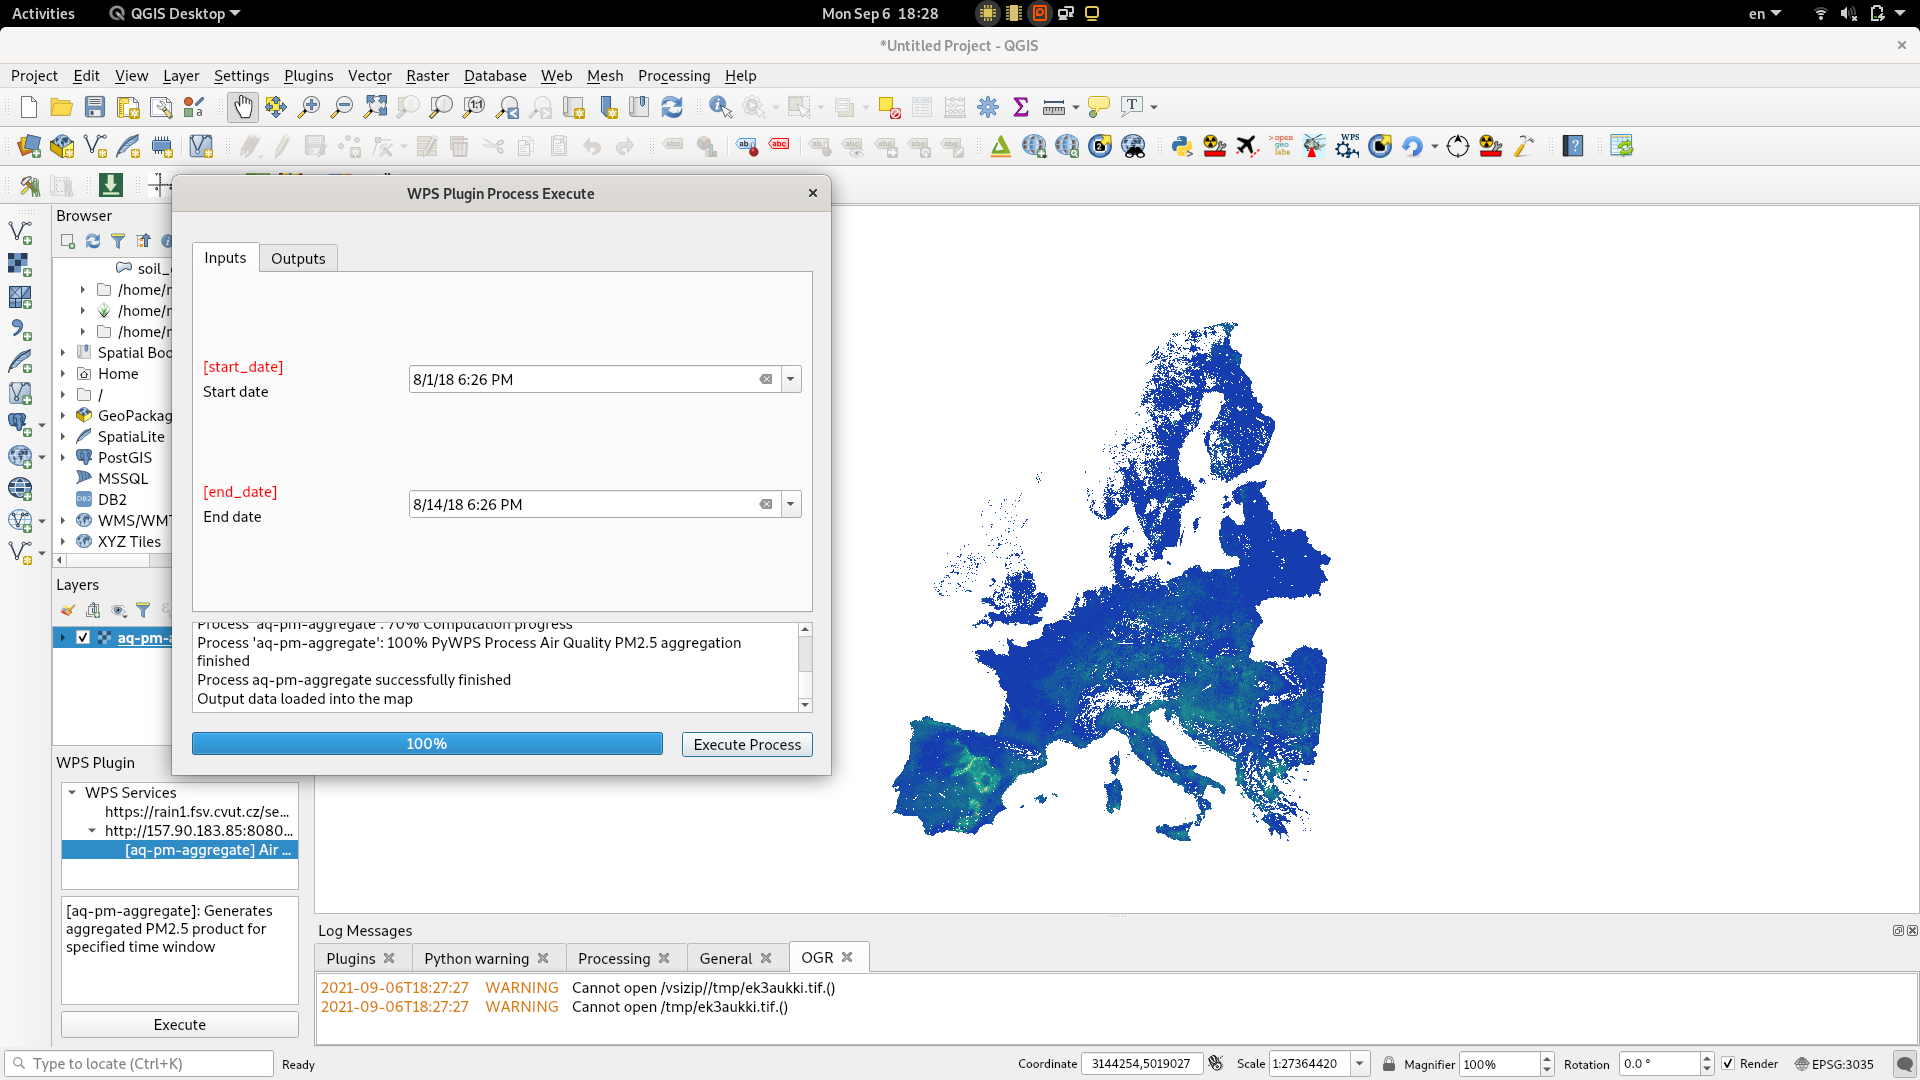